# 과제1. car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst                              # 가설검정 도구 가져오기

### 2) 데이터 불러오기

In [99]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['CompPrice','Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes
3,7.40,4,466,97,Medium,55,Yes
4,4.15,3,340,128,Bad,38,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|


In [100]:
#추가 데이터 다뤄 보기
data2 = pd.read_csv(path)
data2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
cols = {'ShelveLoc' : 'Status','US' : 'Domestic'}
data2.rename(columns = cols, inplace = True)

data2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Status,Age,Education,Urban,Domestic
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [14]:
cols2 = ['Sales','CompPrice','Price','Status','Advertising','Income','Population','Urban','Education','Age','Domestic']
data2.columns = cols2
data2.head()

,Sales,CompPrice,Price,Status,Advertising,Income,Population,Urban,Education,Age,Domestic
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [240]:
data2.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## 1.가설수립

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Sales

In [241]:
data['Sales'].head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

1) 변수의 비즈니스 의미

판매액의 빈도수 분석

2) 숫자, 범주?

In [242]:
data.dtypes

Sales          float64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
US              object
dtype: object

Sales는 실수, Advertising, Population, Price, Age는 정수, ShelveLoc,US는 문자

3) NaN 존재 유무

In [243]:
data.isnull().sum() # No Null

Sales          0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
US             0
dtype: int64

4) 기초통계량(수치화)

In [244]:
data.describe()

,Sales,Advertising,Population,Price,Age
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,6.635000,264.840000,115.795000,53.322500
std,2.824115,6.650364,147.376436,23.676664,16.200297
min,0.000000,0.000000,10.000000,24.000000,25.000000
25%,5.390000,0.000000,139.000000,100.000000,39.750000
50%,7.490000,5.000000,272.000000,117.000000,54.500000
75%,9.320000,12.000000,398.500000,131.000000,66.000000
max,16.270000,29.000000,509.000000,191.000000,80.000000


5) 분포 확인(시각화)

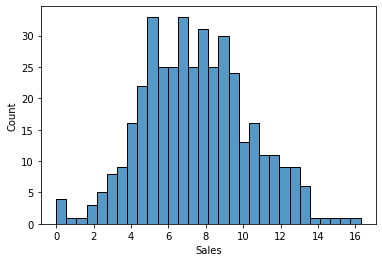

In [245]:
sns.histplot(data = data, x = 'Sales', bins = 30)
plt.show()

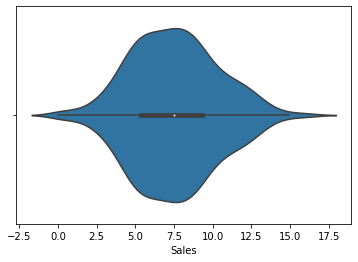

In [246]:
sns.violinplot(data = data, x = 'Sales', showmeans = True, vert = True)
plt.show()

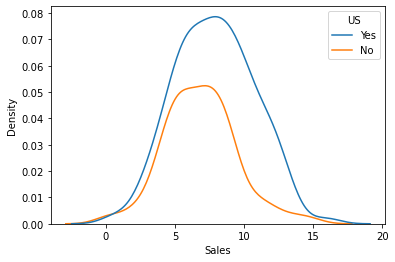

In [247]:
sns.kdeplot(data = data, x = 'Sales', common_norm = True, hue = 'US')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 판매량이 5천 ~ 1만달러 대에 집중되어 있는 것을 보아, 특정 지역에서만 인기가 있다기보다는 판매 지역 전반적으로 균일하게 팔리는 것 같다.

7) 추가 분석해 볼 사항이 있나요?

> * 비슷한 가격대임에도 판매량이 차이가 나는 이유?

### 2) Advertising

In [248]:
data['Advertising'].head()

0    11
1    16
2    10
3     4
4     3
Name: Advertising, dtype: int64

1) 변수의 비즈니스 의미

마케팅에 투입한 비용 별 판매금액 분석

2) 숫자, 범주?

숫자

3) NaN 존재 유무

In [249]:
data['Advertising'].isnull().sum()

0

4) 기초통계량(수치화)

In [250]:
data['Advertising'].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

5) 분포 확인(시각화)

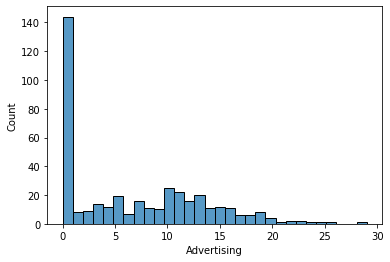

In [251]:
sns.histplot(data = data, x = 'Advertising', bins = 30)
plt.show()

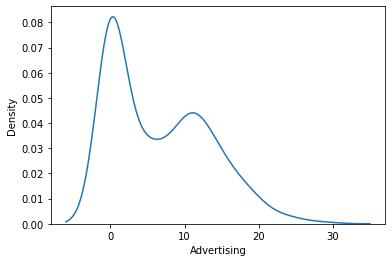

In [252]:
sns.kdeplot(data = data, x = 'Advertising')
plt.show()

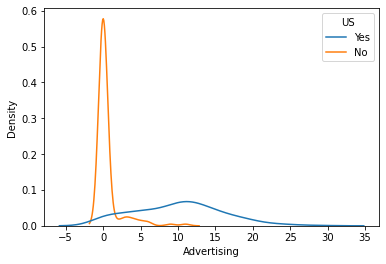

In [108]:
sns.kdeplot(data = data, x = 'Advertising', hue = 'US', common_norm = False)
plt.show()

In [105]:
data['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

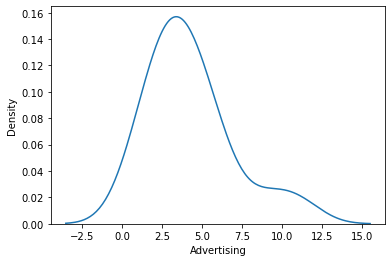

In [112]:
usno = data[(data['Advertising'] > 0) & (data['US'] =='No')]

sns.kdeplot(data = usno, x = 'Advertising')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 광고비를 많이 투입할수록 판매액이 늘어나는 경향이 있다(약함~중간 상관관계)

7) 추가 분석해 볼 사항이 있나요?

> * 광고 예산 투입금액 별 판매량, 판매액

> * 매장이 미국 내에 없는데 광고를 하는 업체의 정체는?

### 3) Population

In [256]:
data['Population'].head()

0    276
1    260
2    269
3    466
4    340
Name: Population, dtype: int64

1) 변수의 비즈니스 의미

인구수 별 판매량, 판매금액 분석

2) 숫자, 범주?

숫자

3) NaN 존재 유무

In [257]:
data['Population'].isnull().sum()

0

4) 기초통계량(수치화)

In [258]:
data['Population'].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

5) 분포 확인(시각화)

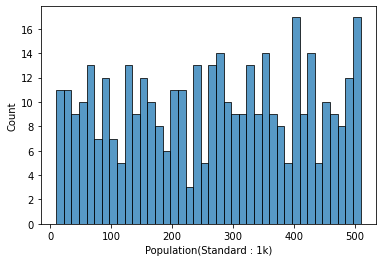

In [259]:
sns.histplot(data = data, x = 'Population', bins = 40)
plt.xlabel('Population(Standard : 1k)')
plt.show()

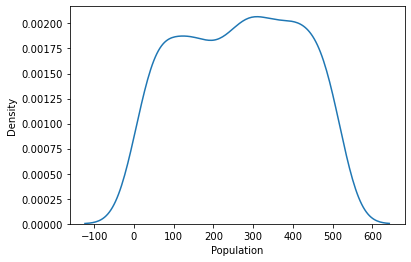

In [260]:
sns.kdeplot(data = data, x = 'Population')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 인구수와 매출액은 약한 상관관계가 있는 것 같다.

7) 추가 분석해 볼 사항이 있나요?

> * 인구 규모 별(대도시/중소도시/농촌 등)로 잘 팔리는 상품 Top5

### 4) Price

In [264]:
data['Price'].head(10)

0    120
1     83
2     80
3     97
4    128
5     72
6    108
7    120
8    124
9    124
Name: Price, dtype: int64

1) 변수의 비즈니스 의미

판매가격대 분포

2) 숫자, 범주?

숫자

3) NaN 존재 유무

In [265]:
data['Price'].isnull().sum()

0

4) 기초통계량(수치화)

In [266]:
data['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

5) 분포 확인(시각화)

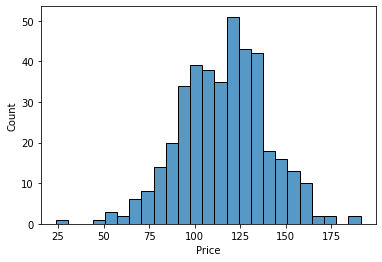

In [267]:
sns.histplot(data = data, x = 'Price', bins = 25)
plt.show()

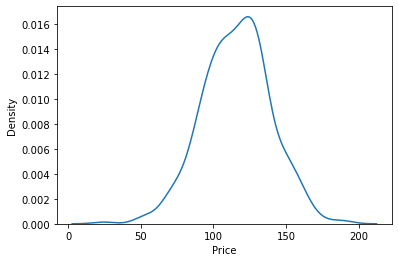

In [268]:
sns.kdeplot(data = data, x = 'Price')
plt.show()

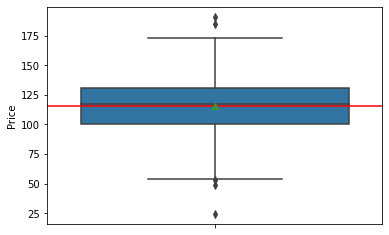

In [315]:
sns.boxplot(data = data, y = 'Price', showmeans = True)
plt.axhline(data['Price'].mean(), color = 'red')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 안전 관련 용품이다 보니 중간 가격대에서 데이터가 수렴되어 있다.
> * 75달러 미만 물건은 중고나 이월상품처럼 상품성이 떨어지는 제품을 거래하는 건가?

7) 추가 분석해 볼 사항이 있나요?

> * 지역 인구 평균 연령대에 따른 구매력과 판매액

### 5) ShelveLoc

In [270]:
data['ShelveLoc'].head(10)

0       Bad
1      Good
2    Medium
3    Medium
4       Bad
5       Bad
6    Medium
7      Good
8    Medium
9    Medium
Name: ShelveLoc, dtype: object

1) 변수의 비즈니스 의미

진열상태가 판매액에 영향을 주는가?

2) 숫자, 범주?

범주

3) NaN 존재 유무

In [271]:
data['ShelveLoc'].isnull().sum()

0

4) 기초통계량(수치화)

In [272]:
data['ShelveLoc'].describe()

count        400
unique         3
top       Medium
freq         219
Name: ShelveLoc, dtype: object

In [273]:
data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

5) 분포 확인(시각화)

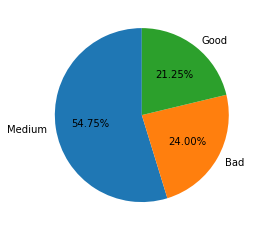

In [274]:
# 진열 상태 빈도

data1 = data['ShelveLoc'].value_counts()

plt.pie(data1.values, labels = data1.index, autopct = '%.2f%%', startangle = 90, counterclock = True, shadow = False)
plt.show()

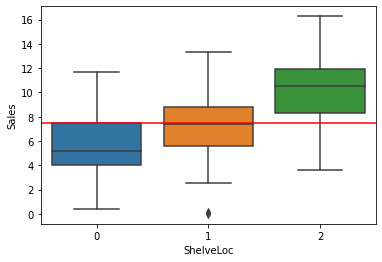

In [316]:
sns.boxplot(data = data, y = 'Sales', x = 'ShelveLoc')
plt.axhline(data['Sales'].mean(), color = 'red')
plt.show()

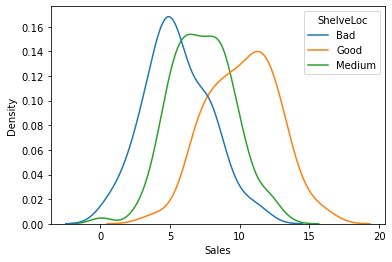

In [276]:
sns.kdeplot(data = data, x = 'Sales', hue = 'ShelveLoc', common_norm = False)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 잘 팔리는 물건이 진열 상태가 좋은 것인지, 진열 상태가 좋은 물건이 잘 팔리는 것인지 확인 필요

7) 추가 분석해 볼 사항이 있나요?

> * 잘 팔리는 물건이 진열 상태가 좋은 것인지, 진열 상태가 좋은 물건이 잘 팔리는 것인지 확인 필요

### 6) [추가]Age

1) 변수의 비즈니스 의미

연령 별 판매액 분석

2) 숫자, 범주?

숫자

3) NaN 존재 유무

In [278]:
data['Age'].isnull().sum()

0

4) 기초통계량(수치화)

In [279]:
data['Age'].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

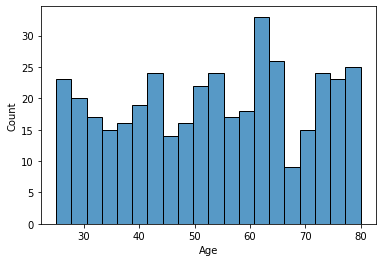

In [280]:
sns.histplot(data = data, x = 'Age', bins = 20)
plt.show()

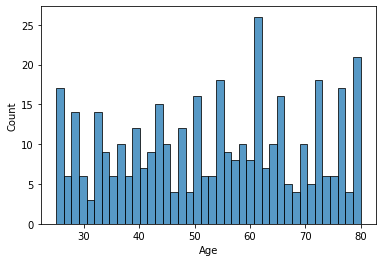

In [281]:
sns.histplot(data = data, x = 'Age', bins = 40)
plt.show()

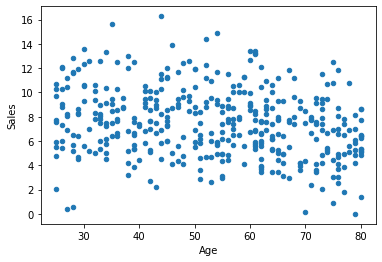

In [282]:
data.plot(kind = 'scatter', x = 'Age', y = 'Sales')
plt.show()

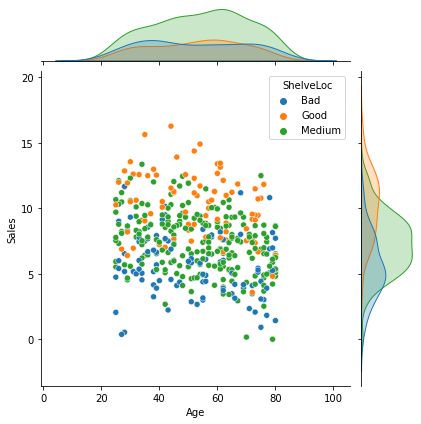

In [283]:
sns.jointplot(data = data, x = 'Age', y = 'Sales', hue = 'ShelveLoc')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 나이가 많은 사람보다는 젊은 사람이 카시트를 구입하는 경우가 많다(젋은 부부가 아기를 위해 사는 경우)

> * 젊은 사람들이 나이 든 사람보다 진열상태에 관대한 경향이 있다(특히 20~30대)

7) 추가 분석해 볼 사항이 있나요?

> * 상품 진열상태가 나쁜 경우 저렴하게 판매하는지 여부

### 7) [추가]US

In [284]:
data['US'].unique()

array(['Yes', 'No'], dtype=object)

1) 변수의 비즈니스 의미

미국 내 매장 존재 여부에 따른 판매액

2) 숫자, 범주?

범주

3) NaN 존재 유무

In [285]:
data['US'].isnull().sum()

0

4) 기초통계량(수치화)

In [286]:
data['US'].describe()

count     400
unique      2
top       Yes
freq      258
Name: US, dtype: object

5) 분포 확인(시각화)

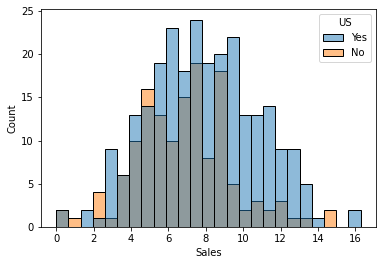

In [288]:
sns.histplot(data = data, x = 'Sales', bins = 25, hue = 'US') #countplot
plt.show()

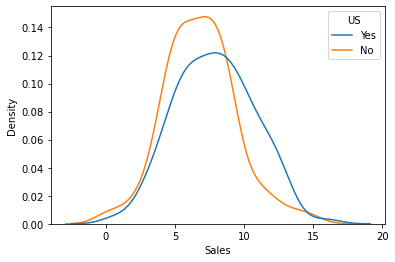

In [287]:
sns.kdeplot(data = data, x = 'Sales', hue = 'US', common_norm = False)
plt.show()

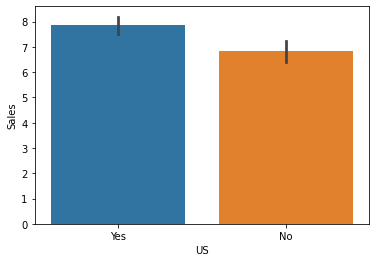

In [289]:
sns.barplot(data = data, y = 'Sales', x = 'US')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 국내에 매장이 있는 경우 인지도와 접근성이 높은 것으로 보인다.

7) 추가 분석해 볼 사항이 있나요?

> * 국내 매장 존재 여부 별 판매 수량

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [290]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### 1) Advertising -> Sales

① 시각화 : scatter(regplot), jointplot

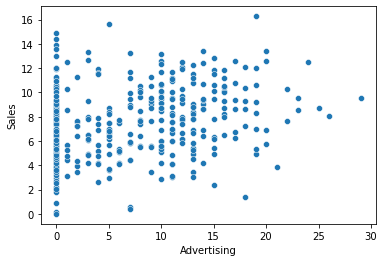

In [291]:
sns.scatterplot(data = data, x = 'Advertising', y = 'Sales')
plt.show()

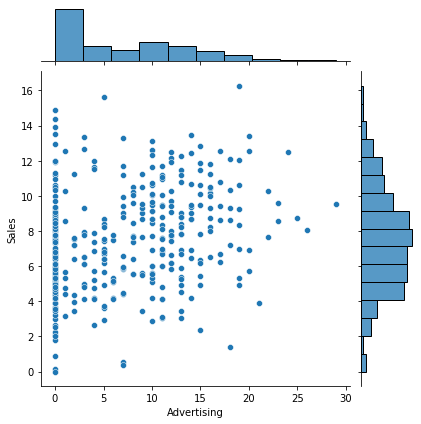

In [292]:
sns.jointplot(data = data, x = 'Advertising', y = 'Sales')
plt.show()

② 수치화 : 상관분석

In [293]:
data.isnull().sum()

Sales          0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
US             0
dtype: int64

In [294]:
AS = spst.pearsonr(data['Advertising'],data['Sales'])
AS

(0.269506781376902, 4.377677110302732e-08)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

약한 상관관계가 있다.

#### 2) Population -> Sales

① 시각화 : scatter(regplot), jointplot

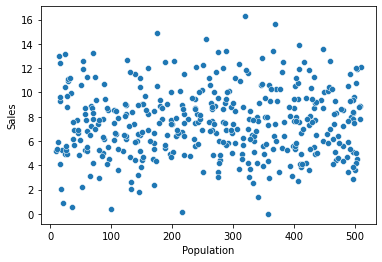

In [295]:
sns.scatterplot(data = data, x ='Population', y = 'Sales')
plt.show()

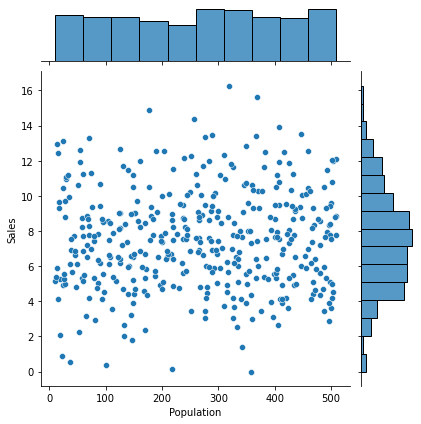

In [296]:
sns.jointplot(data = data, x ='Population', y = 'Sales')
plt.show()

② 수치화 : 상관분석

In [297]:
PS = spst.pearsonr(data['Population'],data['Sales'])
PS

(0.0504709844720392, 0.31398160931903)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

중간 정도의 상관관계가 있다.

#### 3) Price -> Sales

① 시각화 : scatter(regplot), jointplot

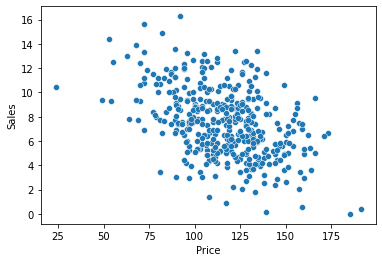

In [298]:
sns.scatterplot(data = data, x = 'Price', y = 'Sales')
plt.show()

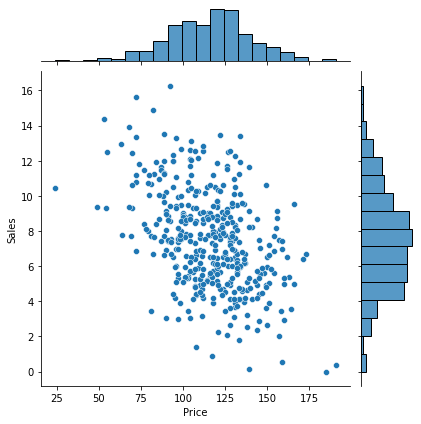

In [299]:
sns.jointplot(data = data, x = 'Price', y = 'Sales')
plt.show()

② 수치화 : 상관분석

In [300]:
pS = spst.pearsonr(data['Price'],data['Sales'])
pS

(-0.4449507278465726, 7.61818701191294e-21)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

중간 정도의 상관관계가 있다.

#### 4) [추가] Age -> Sales

① 시각화 : scatter(regplot), jointplot

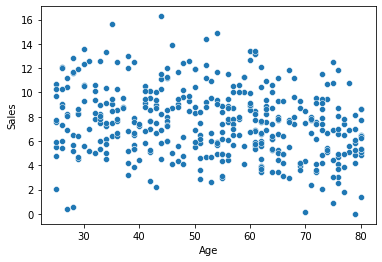

In [301]:
sns.scatterplot(data = data, x = 'Age', y = 'Sales')
plt.show()

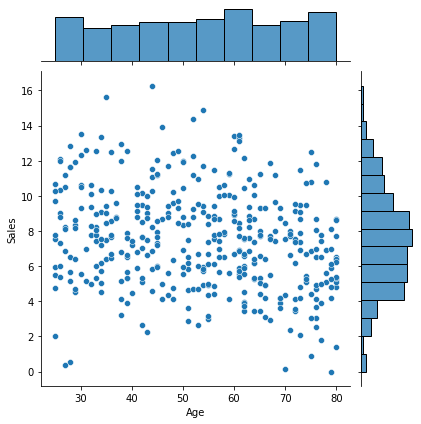

In [302]:
sns.jointplot(data = data, x = 'Age', y = 'Sales')
plt.show()

② 수치화 : 상관분석

In [303]:
AS = spst.pearsonr(data['Age'],data['Sales'])
AS

(-0.2318154396045765, 2.7889498393711916e-06)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

상관관계가 거의 없다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### 1) ShelveLoc-> Sales

① 시각화 : 평균비교 barplot

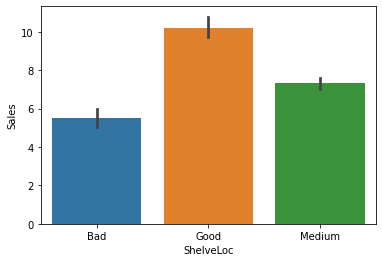

In [304]:
sns.barplot(data = data, y = 'Sales', x = 'ShelveLoc')
plt.show()

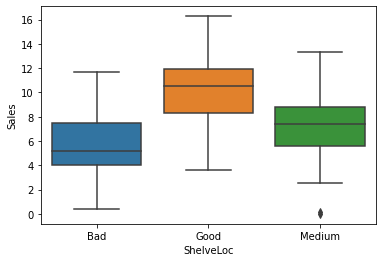

In [305]:
sns.boxplot(data = data, y = 'Sales', x = 'ShelveLoc')
plt.show()

② 수치화 : t-test, anova

In [306]:
data.loc[data['ShelveLoc'] == 'Good','ShelveLoc'] = 2
data.loc[data['ShelveLoc'] == 'Medium','ShelveLoc'] = 1
data.loc[data['ShelveLoc'] == 'Bad','ShelveLoc'] = 0
data['ShelveLoc'].unique()

array([0, 2, 1], dtype=object)

In [307]:
ssl = spst.ttest_ind(data['ShelveLoc'],data['Sales'])
print('result :',ssl[0])
print('p-value :',ssl[1])

result : -44.94248764625299
p-value : 8.05775175921365e-221


In [308]:
ssl2 = spst.f_oneway(data['ShelveLoc'],data['Sales'])
print('result :',ssl2[0])
print('p-value :',ssl2[1])

result : 2019.8271958336027
p-value : 8.057751759212378e-221


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### 2) [추가]US-> Sales

① 시각화 : 평균비교 barplot

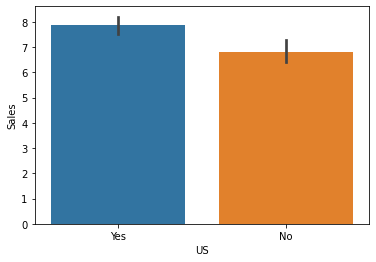

In [309]:
sns.barplot(data = data, x = 'US', y = 'Sales')
plt.show()

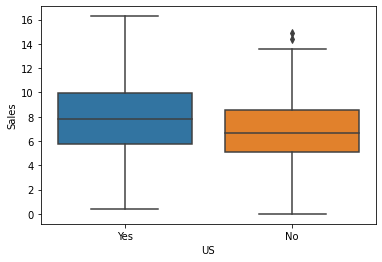

In [310]:
sns.boxplot(data = data, x = 'US', y = 'Sales')
plt.show()

② 수치화 : t-test, anova

In [311]:
data.loc[data['US'] == 'Yes','US'] = 1
data.loc[data['US'] == 'No','US'] = 0
data['US'].unique()

array([1, 0], dtype=object)

In [312]:
us = spst.ttest_ind(data['US'],data['Sales'])
print('result :',us[0])
print('p-value :',us[1])

result : -47.8366379796394
p-value : 1.3379644017260913e-236


In [313]:
us2 = spst.f_oneway(data['US'],data['Sales'])
print('result :',us2[0])
print('p-value :',us2[1])

result : 2288.343933195075
p-value : 1.337964401726429e-236


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

미국 내 매장 존재 여부와 판매량은 강한 상관관계가 있다.

## 4.관계 정리

### 1) 강한관계의 변수

ShelveLoc, US

### 2) 약한관계의 변수

Age, Advertising, Population, Price

### 3) 관계 없음

### 결론

제품 진열 상태별로 차이가 많이 났다

    > medium-bad 묶어서 good - bad 묶기

미국내 - 미국 외 구분 시 유의미한 상관관계가 있는 것 같다

해외에 광고를 많이 해보는 건 어떨까?(가능성) - 가능성 있는 고객에게 프로모션을 제공해보는 게?

광고에 돈을 지나치게 많이 쓰는 것은 지양해야 할 것

중고급형 상품 위주로 파는 것은 어떨까?

### 팀 결론

1. 광고비 지출을 줄이고 매장관리(진열상태)를 신경쓰는 것이 좋다.

2. 가격이 낮을수록 전체 판매액이 증가한다.

3. 20 ~ 30대 고객 위주로 프로모션을 해 보는 것은 어떨까?

4. 고소득층 구매자들이 많은 지역에는 중고급형 상품을, 저소득층 구매자들이 많은 지역은 보급형 상품 위주로 배치

5. 저렴한 제품을 위주로 상품 라인업을 구성하는 게 유리하다

6. 해외 시장을 적극적으로 공략해 보자

### 4) 추가 분석

### 추가) 수입 별 판매액

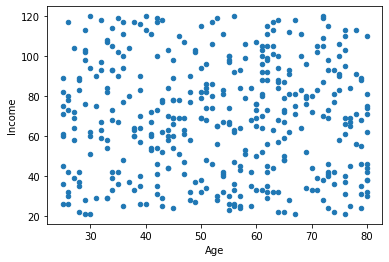

In [317]:
#연령 별 수입
data2.plot(kind = 'scatter', x = 'Age', y = 'Income')
plt.show()

* 수입 별 판매액(시각화)

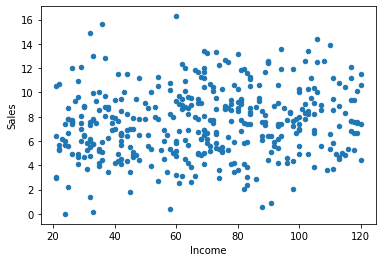

In [318]:
data2.plot(kind = 'scatter', x = 'Income', y = 'Sales')
plt.show()

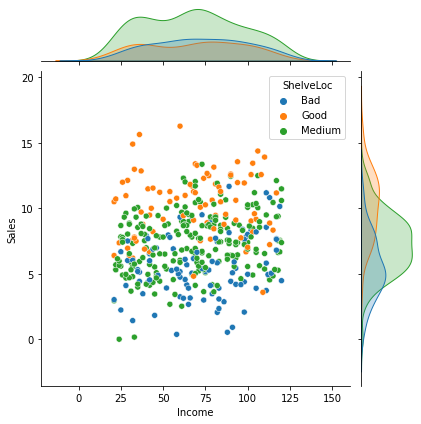

In [319]:
sns.jointplot(data = data2, x = 'Income', y = 'Sales', hue = 'ShelveLoc')
plt.show()

* 수입 별 판매액(수치화)

In [320]:
IS = spst.pearsonr(data2['Income'],data2['Sales'])
IS

(0.15195097946754424, 0.0023096704539517627)

* 결론 : 상관관계 거의 없음.

### 추가) 교육 수준 별 판매액

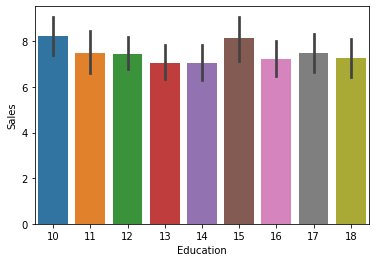

In [321]:
sns.barplot(data = data2, y = 'Sales', x = 'Education')
plt.show()